In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Load data

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

## EDA


In [3]:
categorical_features = []

numerical_features = [] 

for i in train_df.columns : 
    if i == 'Property_ID' :
        continue 
    if train_df[i].nunique() > 20 and train_df[i].dtype!='object' : 
        numerical_features.append(i)
    else  : 
        categorical_features.append(i)

In [4]:
print(categorical_features)
print(numerical_features)

['room', 'layout_type', 'property_type', 'locality', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']
['price', 'area', 'security_deposit', 'neighbourhood']


In [64]:
print(f'Number of test localities : {test_df.locality.nunique()}'  )
print(f'Number of train localities : {train_df.locality.nunique()}' )
print(f'Test localities not in train localities :{test_df.locality.loc[test_df.locality.isin(train_df.locality.unique())==False].nunique()}')
print(f'Train localities not in test localities :{train_df.locality.loc[train_df.locality.isin(test_df.locality.unique())==False].nunique()}')

print(f'Number of test city : {test_df.city.nunique()}'  )
print(f'Number of train city : {train_df.city.nunique()}' )
print(f'Test city not in train city :{test_df.city.loc[test_df.city.isin(train_df.city.unique())==False].nunique()}')
print(f'Train city not in test city :{train_df.city.loc[train_df.city.isin(test_df.city.unique())==False].nunique()}')


print(f'Percentage of train data not of use in test : {100 * train_df.loc[train_df.locality.isin(test_df.locality.unique())==False].shape[0]/train_df.shape[0]}')
print(f'Percentage of test data not in train_data : {100 * test_df.loc[test_df.locality.isin(train_df.locality.unique())==False].shape[0]/test_df.shape[0]}')


Number of test localities : 2756
Number of train localities : 3706
Test localities not in train localities :434
Train localities not in test localities :1384
Number of test city : 8
Number of train city : 8
Test city not in train city :0
Train city not in test city :0
Percentage of train data not of use in test : 1.7091986367990022
Percentage of test data not in train_data : 0.895672360625065


In [22]:
train_df

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134678,152316,3,BHK,Independent Floor,Seawoods,222987,641,Unfurnished,1,Mumbai,...,19,1,0,0,0,1,1783896,1,1,3900
134679,176964,1,BHK,Independent Floor,Aundh,6958,619,Unfurnished,2,Pune,...,2,1,1,0,0,1,62622,0,0,1200
134680,117953,3,BHK,Apartment,Bandra West,85812,2279,Semi-Furnished,3,Mumbai,...,5,0,1,1,1,0,429060,0,0,3900
134681,173686,1,BHK,Apartment,Hinjewadi,15919,1314,Unfurnished,2,Pune,...,14,0,1,0,0,0,79595,0,1,2300


Cities covered  :  ['Chennai' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune' 'Delhi' 'Bangalore'
 'Ahmedabad']
------------------------------

Observing how the prices of houses change with cities 



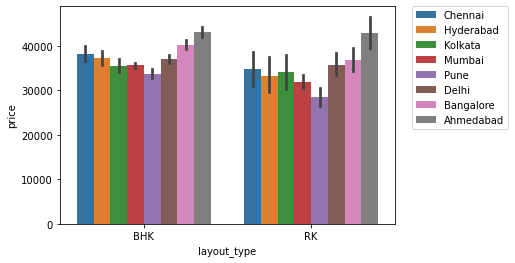

The above figure draws that Ahemdabad is the costliest city ... 

-------------------------------
Now we will see does the floor number indicate any price trend 



No handles with labels found to put in legend.


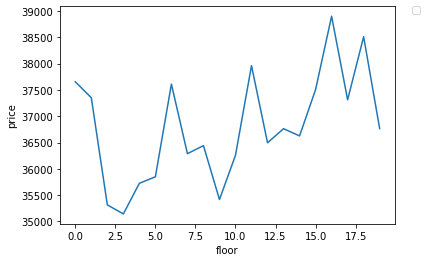

As is visible , increasing floor does not mean that price will increase always .. 
Now checking if the furnishing influences the prices


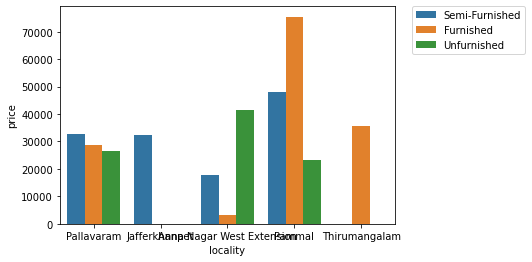

We cannot generalise anything between the furnishing type and price 

------------------------------------

Now we will check the property_type vs Price



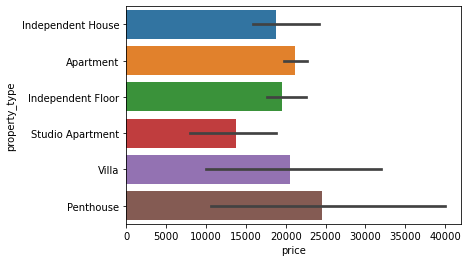

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def summary(df) :
    print("Cities covered  : " , df['city'].unique())
    print("------------------------------\n")
    print("Observing how the prices of houses change with cities \n")
    ax1 = sns.barplot(x="layout_type", y="price", hue="city", data=df, saturation= 0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    print("The above figure draws that Ahemdabad is the costliest city ... \n")
    print("-------------------------------\nNow we will see does the floor number indicate any price trend \n")
    
    ax2 = sns.lineplot(x = 'floor' , data = df , y = 'price'  , ci = None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    print("As is visible , increasing floor does not mean that price will increase always .. ")
    print("Now checking if the furnishing influences the prices")
    fig = plt.figure() 
    gg = train_df[train_df.city == np.random.choice(train_df.city.unique(), 1)[0]]
    g = gg[gg.locality.isin(np.random.choice(gg.locality.unique(), 5))]
    sns.barplot(data = g , x = "locality" , y= 'price' , hue="furnish_type",ci =None )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    print("We cannot generalise anything between the furnishing type and price \n")
    print("------------------------------------\n")
    print("Now we will check the property_type vs Price\n")
    plt.figure()
    sns.barplot(data = train_df[train_df.city == "Mumbai"][train_df.locality == 'Powai'] , y = 'property_type' , x= 'price' , orient="h" , estimator=np.median)
    plt.show()
summary(train_df)

In [80]:
from sklearn.cluster import KMeans

features= list(filter(lambda x : x!='price' , numerical_features))
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_df[features])
train_df['cust_type'] = kmeans.predict(train_df[features])

<AxesSubplot:xlabel='price', ylabel='locality'>

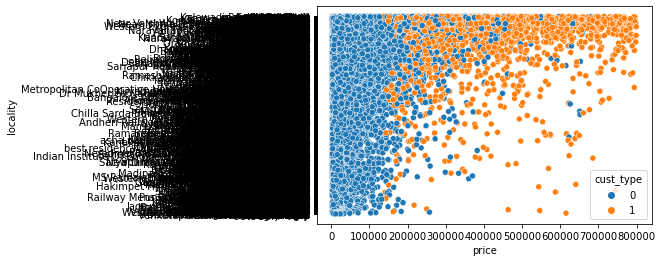

In [86]:
sns.scatterplot(data = train_df , x = 'price',y = 'locality' , hue = 'cust_type')

In [17]:
train_df['train'] =1 
test_df['train'] = 0 

train_df.drop(['Property_ID'] , axis=1  , inplace= True)
test_df.drop(['Property_ID'] , axis = 1 , inplace= True)

# X_train = train_df.drop('price' , axis =1 )
y_train = train_df.loc[: , 'price']

X = pd.concat([train_df, test_df]) 

In [96]:
train_df.groupby('city')['price'].agg('median').sort_values()

city
Pune         17402.0
Mumbai       19493.5
Hyderabad    19804.5
Kolkata      20119.0
Delhi        20690.5
Chennai      21876.0
Bangalore    23876.5
Ahmedabad    25693.0
Name: price, dtype: float64

In [87]:
# Ordinal encoding of features 

X['city'] = X['city'].replace({j : i+1 for i , j in enumerate(train_df.groupby('city')['price'].agg('mean').sort_values(ascending = True).keys())})
X['furnish_type'] = X['furnish_type'].replace({j: i+1 for i, j in enumerate(train_df.groupby('furnish_type')['price'].agg('mean').sort_values(ascending = True).keys())} )
X['property_type'] = X['property_type'].replace({j : i+1 for i , j in enumerate(X.groupby('property_type')['price'].agg('mean').sort_values(ascending= True).keys())})
X['layout_type'] = X['layout_type'].replace({j : i for i , j in enumerate(X.groupby('layout_type')['price'].agg('mean').sort_values(ascending= True).keys())})
X['locality'] = X.locality.replace({ j: i+1 for i,j in enumerate((X.groupby('locality')['price'].agg('median').sort_values(ascending= True).keys()))})

In [59]:
from sklearn.cluster import KMeans
features= list(filter(lambda x : x!='price', X.columns))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[features])
X['cust_type'] = kmeans.predict(X[features])

In [88]:
X

,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,...,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,train,cust_type
0,3,1,3,1767,33624.0,1312,2,2,6,1,...,0,0,1,0,302616,0,0,300,1,0
1,1,1,6,1470,9655.0,1474,1,2,4,0,...,1,0,0,1,19310,0,1,1600,1,0
2,3,1,6,1833,23699.0,1837,3,2,3,0,...,1,1,1,0,118495,0,1,3100,1,0
3,1,1,6,1494,6306.0,606,1,1,2,0,...,0,0,0,0,37836,0,1,300,1,0
4,1,1,1,705,12008.0,498,3,3,1,0,...,0,1,1,0,72048,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57717,3,1,6,1656,NaN,1628,3,2,2,1,...,0,1,1,0,77049,0,0,2900,0,0
57718,1,1,6,1510,NaN,729,1,1,4,0,...,0,0,0,0,29074,1,0,3100,0,0
57719,3,0,4,2595,NaN,897,2,3,8,1,...,1,0,1,1,188088,1,1,1100,0,0
57720,3,1,4,1905,NaN,2229,1,1,5,0,...,1,0,0,0,103938,0,0,1500,0,0


In [97]:
X_train = X.loc[(X.train == 1) & (X.cust_type == 0)].drop(['train','cust_type','price'] , axis = 1 )
y_train = X.loc[(X.train == 1) & (X.cust_type == 0)].loc[ : , ['price']]
X_test = X.loc[X.train == 0 ].drop(['train','cust_type' ,'price'],axis=1)

## Disposed off techniques

In [ ]:


# one hot encoding

# from sklearn.preprocessing import OneHotEncoder 

# X = pd.get_dummies(X , categorical_features)
# # One hot encoding  

# from sklearn.preprocessing import OneHotEncoder 

# onehot = OneHotEncoder() 

# onehot.fit_transform(X_train.loc[numerical_features]) 
# onehot.transform(X_test) 
# from sklearn.feature_selection import SelectKBest ,f_regression

# selector = SelectKBest(f_regression , k = 2)
# x_train  = selector.fit_transform(X_train , y_train)
# x_test = selector.transform(X_test)
# cols = list(X_train.columns[selector.get_support()])
# cols
# X_train  = pd.DataFrame(columns= cols , data= x_train ) 
# X_test = pd.DataFrame(columns= cols , data = x_test) 
# all_data['more_than_equals_1_room'] = list(map(lambda x: 1 if x > 1 else 0, all_data.room))
# all_data['more_than_2_rooms'] = list(map(lambda x :1 if x > 2 else 0 ,all_data.room) )
# all_data['more_than_3_rooms'] = list(map(lambda x :1 if  x > 3 else 0 ,all_data.room))

# all_data['more_than_equals_1_bathroom'] = list(map(lambda x: 1 if x > 1 else 0, all_data.bathroom))
# all_data['more_than_2_rooms_bathroom'] = list(map(lambda x :1 if x > 2 else 0 ,all_data.bathroom) )
# all_data['more_than_3_rooms_bathroom'] = list(map(lambda x :1 if  x > 3 else 0 ,all_data.bathroom))
# all_data['bathroom/room'] = round(all_data['room'] / all_data['bathroom'])
# print(all_data['bathroom/room'].unique())
# # sns.scatterplot(x = all_data.security_deposit , y = all_data.price )
# from scipy import stats
# z = np.abs(stats.zscore(all_data.security_deposit))

# arr = []

# for i , x in enumerate(z) : 
#     if x > 3 : 
#         arr.append(i) 

# all_data_mod = all_data.iloc[arr , : ].dropna()
# pd.concat([all_data, all_data_mod]).drop_duplicates(keep=False).dropna().corr()['price']
# # The correlation has reduced betweeen security_deposit and price from 0.89 to 0.80 , thus turns out removing outliers is decreasing correlation and later the model predictions as well :(
# def filterFunc(x) :
#   if abs(x[1]) > 0.12 and x[0] not in ['Property_ID' , 'price'] : 
#     return x[0] 

# fil = map(lambda x : x[0] , filter(filterFunc,all_data.corr()['price'].iteritems()))
# fil = list(fil)
# from scipy.stats import norm, skew
# numeric_feats = numerical_features

# # Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew' :skewed_feats})

## Model


Linear Models 
1) LinearRegression
2) Lasso

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
cross_val_score(lin_reg , X_train, y_train, cv = 5,scoring='neg_root_mean_squared_error' )


array([-22034.26867372, -21120.31156   , -21318.09718248, -21760.05454799,
       -20499.60611298])

In [102]:
from sklearn.linear_model import RidgeCV 

ridge = RidgeCV()
cross_val_score(ridge, X_train, y_train, cv = 5,scoring='neg_root_mean_squared_error' )

array([-22157.30817972, -21162.32796151, -22191.31105468, -24744.02495756,
       -20558.35280167])

In [100]:
from sklearn.tree import DecisionTreeRegressor

tree  = DecisionTreeRegressor()

cross_val_score(tree , X_train , y_train , cv = 3 , scoring='neg_root_mean_squared_error')

array([-31510.75675074, -31608.17641118, -30555.09699206])

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth = 3)
cross_val_score(forest , X_train , y_train, cv = 3 , scoring='neg_root_mean_squared_error' )

array([-22172.68112366, -21288.81980325, -21434.53080952])

RidgeCV 
XGBRegressor

In [191]:
!pip install hyperopt

In [104]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size = 0.33 , random_state= 33) 

In [29]:
from xgboost import XGBRegressor
from hyperopt import STATUS_OK,Trials, fmin, hp, tpe
from sklearn.metrics import mean_squared_error

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'eta': hp.quniform('eta' , 0.01 , 1 ,0.005 ) ,
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }


def objective(space):
   
    xgb_reg = XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    xgb_reg.fit(X_train, y_train,
            eval_set=evaluation, eval_metric= "rmse",
            early_stopping_rounds=10,verbose=True)
    
    pred = xgb_reg.predict(X_test)
    pred = expm1(pred)
    accuracy = np.power(mean_squared_error(expm1(y_test),pred),0.5)

    return {'loss': accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [92]:
best_hyperparams

{'colsample_bytree': 0.5084013079461859,
 'eta': 0.5650000000000001,
 'gamma': 6.134663657215085,
 'max_depth': 4.0,
 'min_child_weight': 2.0,
 'reg_alpha': 111.0,
 'reg_lambda': 0.6361814792928543}

In [97]:
X_train = X.loc[X['train'] == 1]
X_test = X.loc[X['train'] == 0 ]

In [98]:
X_train = X.loc[X['train'] == 1]
X_test = X.loc[X['train'] == 0 ]

X_train.drop('train' , axis = 1 , inplace = True)
X_test.drop('train' ,axis =  1 , inplace =  True)

# X_train.drop('price' , axis =1 , inplace = True)
# X_test.drop('price' , axis = 1 , inplace= True)

c:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [100]:
y_train = X_train.loc[: , ['price']]

In [ ]:
xgb_reg = XGBRegressor(params = best_hyperparams)
xgb_reg.fit(X_train , y_train )

In [103]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
cross_val_score(lgbm , X_train  , y_train ,  scoring = 'neg_root_mean_squared_error')

array([-22125.1830074 , -21246.17899215, -21697.54813754, -21806.89200888,
       -20608.76287213])